In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
solar_flare = fetch_ucirepo(id=89) 
  
# data (as pandas dataframes) 
X = solar_flare.data.features 
feature_names = X.columns.tolist()

# metadata 
print(solar_flare.metadata) 
  
# variable information 
print(solar_flare.variables) 


{'uci_id': 89, 'name': 'Solar Flare', 'repository_url': 'https://archive.ics.uci.edu/dataset/89/solar+flare', 'data_url': 'https://archive.ics.uci.edu/static/public/89/data.csv', 'abstract': 'Each class attribute counts the number of solar flares of a certain class that occur in a 24 hour period', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1389, 'num_features': 10, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['common flares', 'moderate flares', 'severe flares'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5530G', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Notes:\r\n\r\n   -- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period.\r\n   -- Each instance represents captur

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders for both categorical columns
le_largest_spot = LabelEncoder()
le_spot_distribution = LabelEncoder()
le_modified_zurich_class = LabelEncoder()

# Fit and transform the categorical columns
X['largest spot size'] = le_largest_spot.fit_transform(X['largest spot size'])
X['spot distribution'] = le_spot_distribution.fit_transform(X['spot distribution'])
X['modified Zurich class'] = le_spot_distribution.fit_transform(X['modified Zurich class'])

c:\Users\swath\anaconda3\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\swath\anaconda3\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\swath\AppData\Local\Temp\ipykernel_18388\4147510705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['largest spot size'] = le_largest_spot.fit_transform(X['largest spot size'])
c:\Users\swath\anaconda3\envs\

In [4]:
X

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot
0,1,4,2,1,2,1,1,2,1,2
1,2,4,2,1,3,1,1,2,1,2
2,1,4,2,1,3,1,1,2,1,1
3,2,4,2,1,3,1,1,2,1,2
4,2,0,2,1,3,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
1384,5,4,3,1,2,1,1,1,1,1
1385,5,4,3,2,2,1,1,2,1,1
1386,1,4,2,1,2,1,2,2,1,1
1387,5,3,3,1,2,1,1,2,1,1


In [5]:
grouped_data = []

for _, group in X.groupby('largest spot size'):
    group_data = group.drop(columns=['largest spot size']).to_numpy()
    grouped_data.append(group_data)

In [6]:
datasets = grouped_data

In [7]:
len(datasets)

6

In [8]:
feature_names.remove("largest spot size")

In [9]:
feature_names

['modified Zurich class',
 'spot distribution',
 'activity',
 'evolution',
 'previous 24 hour flare activity',
 'historically-complex',
 'became complex on this pass',
 'area',
 'area of largest spot']

In [32]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier
classifier = OneClassSMMClassifier(nu=0.22)
classifier.fit(datasets)

nu is set to 0.34 since we want 2 outliers out of 6 which is 33.33 percent

In [33]:
decision, y_pred = classifier.predict(datasets)

[0.80928736 0.80928741 0.80928744]


In [34]:
decision


array([ 9.07604640e-02,  7.95120900e-02, -4.21050710e-08,  1.20854251e-01,
        2.48219545e-09,  3.96228756e-08])

In [35]:
y_pred

array([ 1.,  1., -1.,  1.,  1.,  1.])

In [36]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[2]

In [37]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 511/511 [00:42<00:00, 11.98it/s]


In [38]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


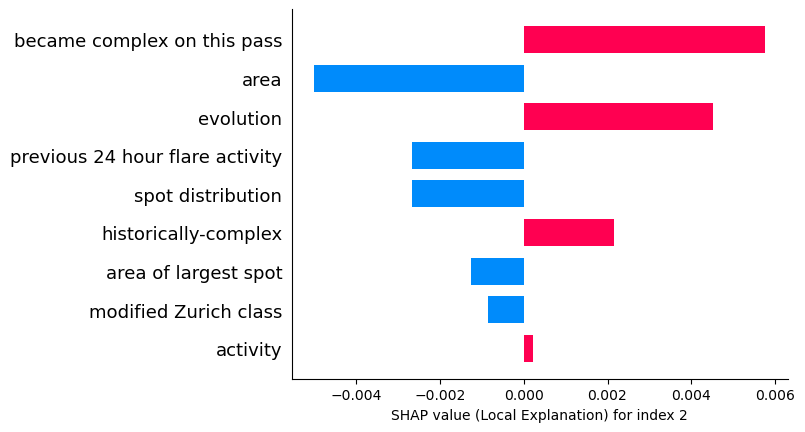

In [40]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot
local_bar_plot(shapley_values, 2,  feature_names=feature_names)

In [41]:
# local_bar_plot(shapley_values, 5,  feature_names=feature_names)

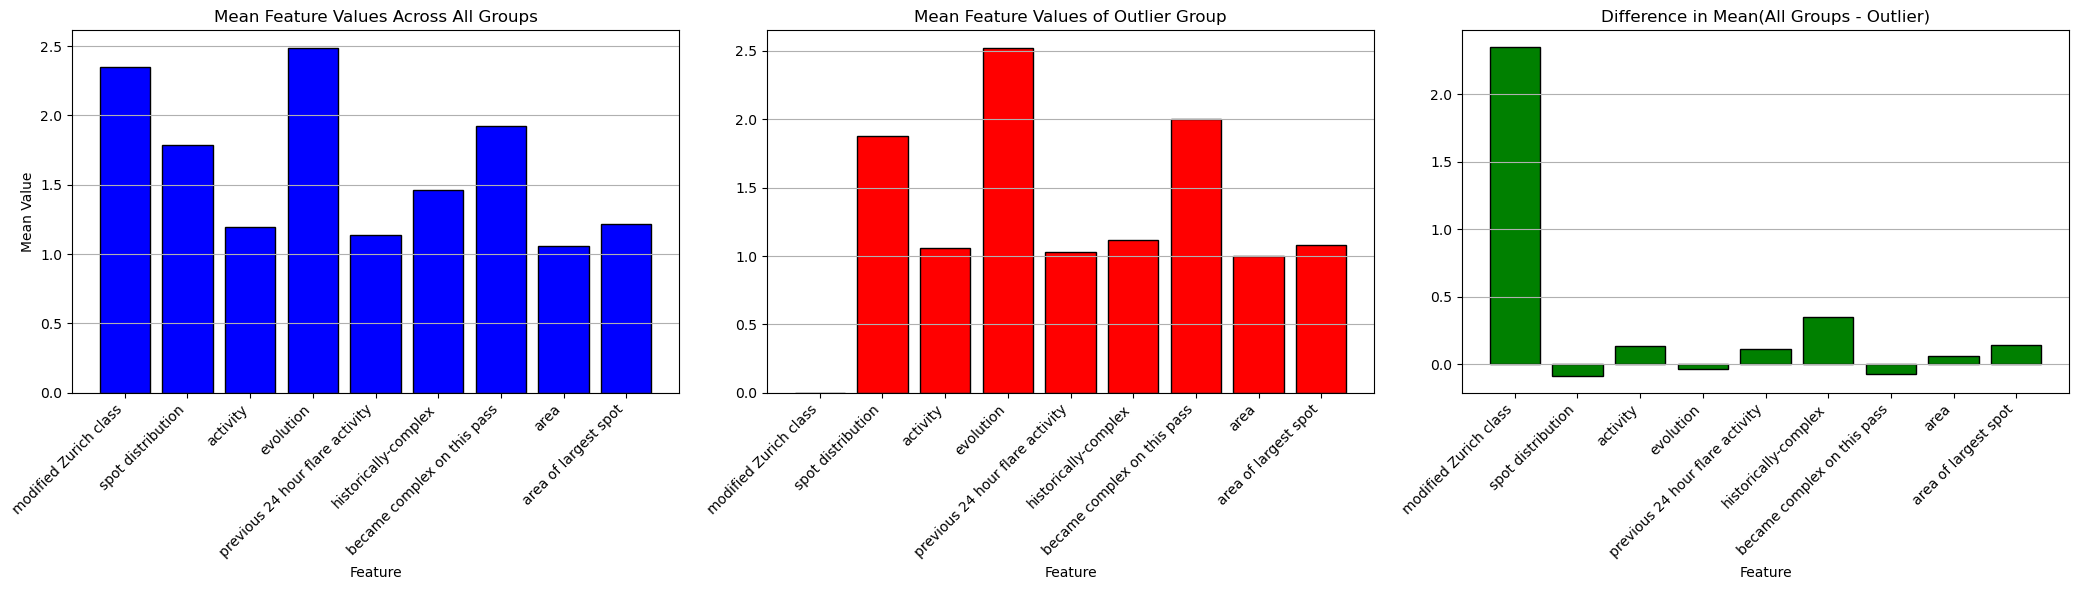

In [42]:
import matplotlib.pyplot as plt 
mean_all_groups = np.mean([np.mean(group, axis=0) for i, group in enumerate(datasets) if i != 8], axis=0)

# Compute mean feature values for the outlier group
mean_outlier_group = np.mean(datasets[5], axis=0)

# Compute the delta between the two (outlier vs all groups)
difference_values =  mean_all_groups - mean_outlier_group

percentage_change = ((mean_outlier_group - mean_all_groups) / mean_all_groups) * 100

# Feature names for labeling
num_features = len(mean_all_groups)
x_labels = feature_names[:num_features]  # Adjust based on the number of features

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(21, 6), sharey=False)

# Mean feature values for all groups (excluding outlier)
ax[0].bar(range(num_features), mean_all_groups, color='blue', edgecolor='black')
ax[0].set_xticks(range(num_features))
ax[0].set_xticklabels(x_labels, rotation=45, ha='right')
ax[0].set_title('Mean Feature Values Across All Groups')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Mean Value')
ax[0].grid(axis='y')

# Mean feature values for the outlier group
ax[1].bar(range(num_features), mean_outlier_group, color='red', edgecolor='black')
ax[1].set_xticks(range(num_features))
ax[1].set_xticklabels(x_labels, rotation=45, ha='right')
ax[1].set_title('Mean Feature Values of Outlier Group')
ax[1].set_xlabel('Feature')
ax[1].grid(axis='y')

# Delta values (difference between the outlier group and all groups)
ax[2].bar(range(num_features), difference_values, color='green', edgecolor='black')
ax[2].set_xticks(range(num_features))
ax[2].set_xticklabels(x_labels, rotation=45, ha='right')
ax[2].set_title('Difference in Mean(All Groups - Outlier)')
ax[2].set_xlabel('Feature')
ax[2].grid(axis='y')

# ax[3].bar(range(num_features), percentage_change, color='purple', edgecolor='black')
# ax[3].set_xticks(range(num_features))
# ax[3].set_xticklabels(x_labels, rotation=45, ha='right')
# ax[3].set_title('Percentage Change (Outlier - All Groups)')
# ax[3].set_xlabel('Feature')
# ax[3].grid(axis='y')

# fig, ax2 = plt.subplots(figsize=(14, 6))  # New figure for the percentage change plot
# ax2.bar(range(num_features), percentage_change, color='purple', edgecolor='black')
# ax2.set_xticks(range(num_features))
# ax2.set_xticklabels(x_labels, rotation=45, ha='right')
# ax2.set_title('Percentage Change (Outlier - All Groups)')
# ax2.set_xlabel('Feature')
# ax2.grid(axis='y')

plt.tight_layout()
plt.show()

In [145]:
X_scaled_df = pd.DataFrame(X, columns=X.columns)

grouped_data = []

for i, (_, group) in enumerate(X_scaled_df.groupby('largest spot size')):
    group_data = group.drop(columns=['largest spot size']).to_numpy()
    artificial_feature = np.ones((group_data.shape[0],1))  # Default value = 1
    if i == 4:  # and group has anomolous a_f
        artificial_feature.fill(10)
    
    group_data = np.hstack((group_data, artificial_feature))  # Append feature
    grouped_data.append(group_data)

In [146]:
feature_names.append('artificial_feature')

In [147]:
feature_names

['modified Zurich class',
 'spot distribution',
 'activity',
 'evolution',
 'previous 24 hour flare activity',
 'historically-complex',
 'became complex on this pass',
 'area',
 'area of largest spot',
 'artificial_feature',
 'artificial_feature',
 'artificial_feature',
 'artificial_feature']

In [148]:
datasets = grouped_data

In [149]:
datasets

[array([[2., 2., 1., ..., 1., 2., 1.],
        [2., 2., 1., ..., 1., 2., 1.],
        [2., 2., 1., ..., 1., 1., 1.],
        ...,
        [3., 1., 1., ..., 1., 1., 1.],
        [3., 2., 1., ..., 1., 1., 1.],
        [3., 1., 2., ..., 1., 1., 1.]]),
 array([[1., 1., 1., 3., 1., 1., 2., 1., 2., 1.],
        [5., 3., 1., 2., 1., 2., 2., 1., 1., 1.],
        [5., 3., 1., 3., 1., 1., 2., 1., 2., 1.],
        [2., 2., 1., 2., 1., 1., 2., 1., 2., 1.],
        [1., 1., 2., 3., 1., 1., 2., 1., 2., 1.],
        [1., 1., 2., 2., 3., 1., 2., 1., 2., 1.],
        [2., 1., 1., 3., 1., 1., 2., 1., 2., 1.],
        [2., 1., 2., 3., 3., 2., 2., 1., 2., 1.],
        [1., 1., 1., 2., 1., 2., 2., 1., 2., 1.],
        [1., 2., 1., 2., 1., 2., 2., 1., 2., 1.],
        [5., 3., 1., 3., 1., 1., 2., 1., 2., 1.],
        [5., 3., 1., 2., 1., 1., 1., 1., 1., 1.],
        [5., 3., 1., 3., 1., 1., 1., 1., 1., 1.],
        [1., 2., 1., 3., 1., 1., 2., 1., 1., 1.],
        [5., 3., 1., 3., 1., 1., 2., 1., 1., 1.],
 

In [150]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [157]:
classifier = OneClassSMMClassifier(nu=0.35)

In [158]:
classifier.fit(datasets)

In [159]:
decision, y_pred = classifier.predict(datasets)

[0.82366082 0.8236609  0.82366119 0.82366096]


In [160]:
y_pred

array([ 1., -1., -1.,  1.,  1., -1.])

In [161]:
decision

array([ 4.63655858e-02, -1.50412231e-07, -7.04610118e-08,  4.10863113e-02,
        2.28817898e-07, -7.94465516e-09])

In [162]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[1, 2, 5]

In [45]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

divide by zero encountered in log2
invalid value encountered in cast
invalid value encountered in log2
  0%|          | 0/1023 [00:00<?, ?it/s]

100%|██████████| 1023/1023 [01:30<00:00, 11.28it/s]


In [46]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [47]:
shapley_values

tensor([[ 0.0005,  0.0105, -0.0015,  0.0417, -0.0152, -0.0210],
        [-0.0028,  0.0081, -0.0015,  0.0102,  0.0036, -0.0021],
        [ 0.0005,  0.0037, -0.0014,  0.0057,  0.0027,  0.0038],
        [-0.0002,  0.0085,  0.0020,  0.0036, -0.0018,  0.0028],
        [ 0.0022,  0.0042, -0.0015,  0.0038,  0.0027,  0.0034],
        [-0.0002,  0.0053, -0.0005,  0.0062,  0.0015,  0.0027],
        [ 0.0022,  0.0031,  0.0025,  0.0056, -0.0003,  0.0019],
        [ 0.0035,  0.0050, -0.0019,  0.0030,  0.0026,  0.0028],
        [ 0.0006,  0.0060, -0.0003,  0.0042,  0.0017,  0.0026],
        [-0.0063,  0.0064,  0.0043,  0.0043,  0.0031,  0.0033]])

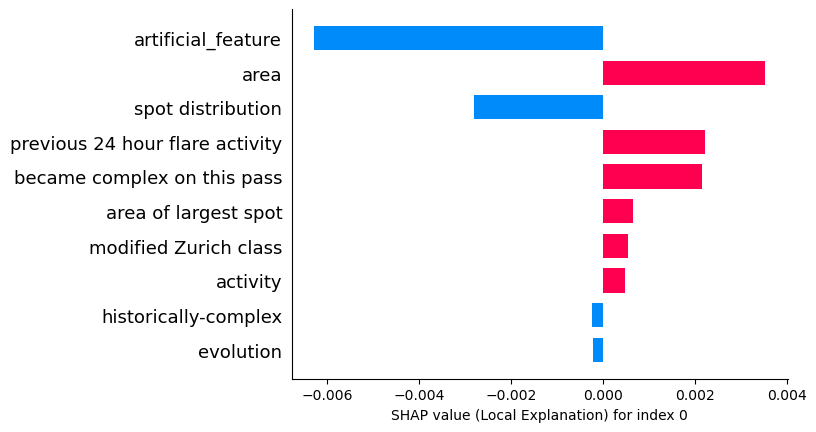

In [48]:
from src.utils.visualisation.deterministic_values import global_bar_plot, local_bar_plot
local_bar_plot(shapley_values, 0, feature_names=feature_names)

artificial feature is the highest contribution towars making this group an outlier.

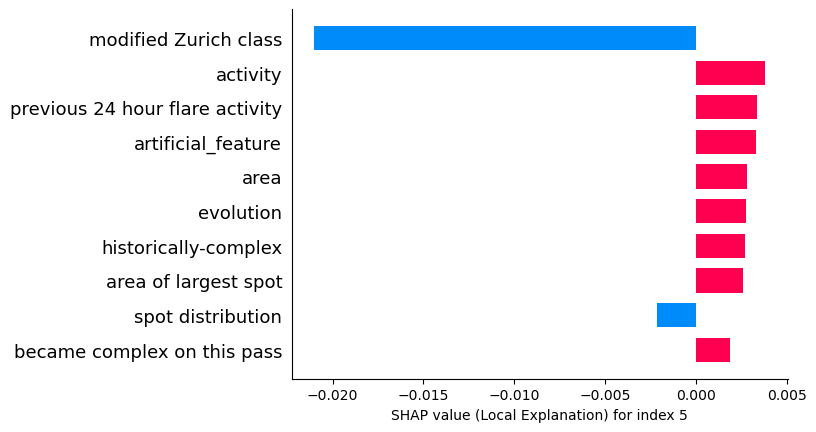

In [49]:
local_bar_plot(shapley_values, 5, feature_names=feature_names)

For the other outlier, it is caused due to other reasons(similar to first part) and not artificial_feature.

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)


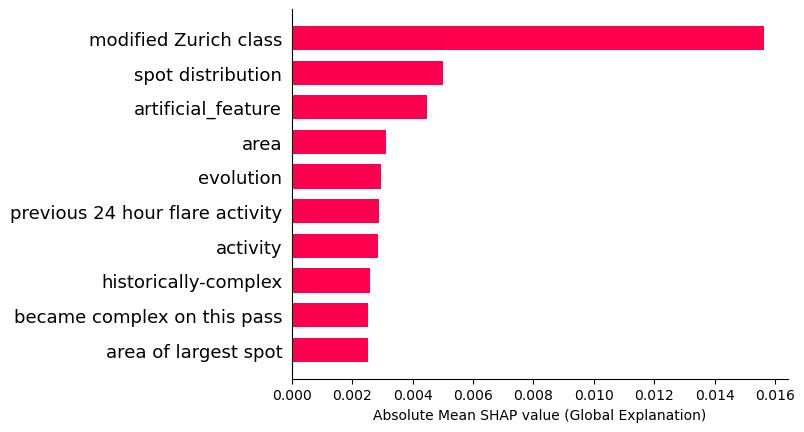

In [37]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values, feature_names=feature_names)

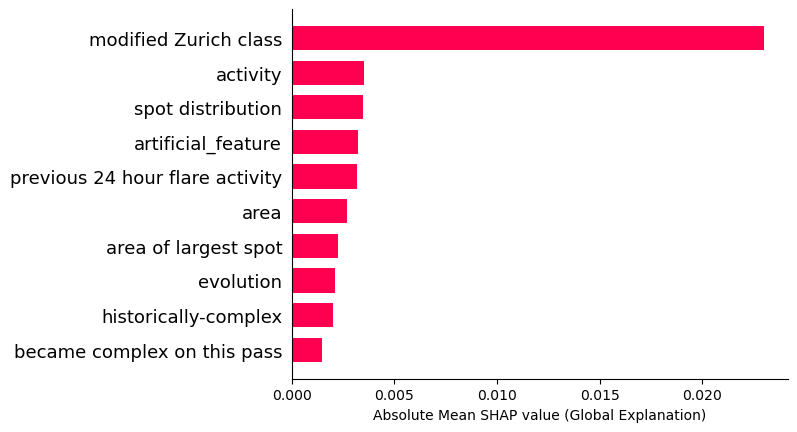

In [38]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier, feature_names=feature_names)